In [1]:
import pandas as pd
import xgboost as xgb

In [2]:
df = pd.read_csv('sb_30-05_slim_slim-1.csv')

In [3]:
df.head()

,x,y,goalkeeper_dx,goalkeeper_dy,opposition_1_dx,opposition_1_dy,opposition_2_dx,opposition_2_dy,opposition_3_dx,opposition_3_dy,...,shot_one_on_one,shot_outcome,shot_technique,shot_statsbomb_xg,shot_type,under_pressure,prev_type,goal,prev_x,prev_y
0,100.4,35.1,18.0,3.4,1.5,0.0,5.0,-3.6,6.8,3.0,...,False,Blocked,Normal,0.056644,Open Play,False,Ball Recovery,False,101.7,35.6
1,114.6,33.5,3.7,2.9,-0.3,1.1,-1.6,3.6,0.0,5.6,...,False,Saved,Normal,0.143381,Open Play,True,Pass,False,111.0,69.2
2,106.2,55.8,12.0,-12.9,2.7,3.9,2.9,-5.0,2.7,-9.6,...,False,Blocked,Normal,0.038188,Open Play,False,Ball Recovery,False,105.8,56.5
3,113.9,47.4,5.0,-5.5,0.2,-1.0,-0.7,-0.8,-0.9,-2.3,...,False,Blocked,Normal,0.052781,Open Play,False,Pass,False,120.0,0.1
4,89.2,42.5,27.7,-2.4,2.7,1.3,3.1,-1.9,1.9,9.0,...,False,Blocked,Normal,0.021272,Open Play,True,Carry,False,87.6,46.0


In [4]:
print(list(df.columns))

['x', 'y', 'goalkeeper_dx', 'goalkeeper_dy', 'opposition_1_dx', 'opposition_1_dy', 'opposition_2_dx', 'opposition_2_dy', 'opposition_3_dx', 'opposition_3_dy', 'opposition_4_dx', 'opposition_4_dy', 'teammate_1_dx', 'teammate_1_dy', 'teammate_2_dx', 'teammate_2_dy', 'goalkeeper_x', 'goalkeeper_y', 'opposition_1_x', 'opposition_1_y', 'opposition_2_x', 'opposition_2_y', 'opposition_3_x', 'opposition_3_y', 'opposition_4_x', 'opposition_4_y', 'teammate_1_x', 'teammate_1_y', 'teammate_2_x', 'teammate_2_y', 'play_pattern', 'shot_aerial_won', 'shot_body_part', 'shot_first_time', 'shot_one_on_one', 'shot_outcome', 'shot_technique', 'shot_statsbomb_xg', 'shot_type', 'under_pressure', 'prev_type', 'goal', 'prev_x', 'prev_y']


In [5]:
df.dtypes

x                    float64
y                    float64
goalkeeper_dx        float64
goalkeeper_dy        float64
opposition_1_dx      float64
opposition_1_dy      float64
opposition_2_dx      float64
opposition_2_dy      float64
opposition_3_dx      float64
opposition_3_dy      float64
opposition_4_dx      float64
opposition_4_dy      float64
teammate_1_dx        float64
teammate_1_dy        float64
teammate_2_dx        float64
teammate_2_dy        float64
goalkeeper_x         float64
goalkeeper_y         float64
opposition_1_x       float64
opposition_1_y       float64
opposition_2_x       float64
opposition_2_y       float64
opposition_3_x       float64
opposition_3_y       float64
opposition_4_x       float64
opposition_4_y       float64
teammate_1_x         float64
teammate_1_y         float64
teammate_2_x         float64
teammate_2_y         float64
play_pattern          object
shot_aerial_won         bool
shot_body_part        object
shot_first_time         bool
shot_one_on_on

In [6]:
sb_labs = df['shot_statsbomb_xg'].values
y = df['goal'].values

print(f"sb_labs shape: {sb_labs.shape}, y shape: {y.shape}")

sb_labs shape: (77617,), y shape: (77617,)


In [7]:
df['header'] = df['shot_body_part'] == 'Head'
df['header'] = df['header'].astype(int)
df['shot_aerial_won'] = df['shot_aerial_won'].astype(int)
df['shot_first_time'] = df['shot_first_time'].astype(int)
df['shot_one_on_one'] = df['shot_one_on_one'].astype(int)
df['under_pressure'] = df['under_pressure'].astype(int)

In [8]:
df.drop(['shot_body_part', 'shot_technique', 'shot_outcome', 'goal', 'shot_statsbomb_xg'], axis = 1, inplace = True)

In [9]:
print(list(df.columns))

['x', 'y', 'goalkeeper_dx', 'goalkeeper_dy', 'opposition_1_dx', 'opposition_1_dy', 'opposition_2_dx', 'opposition_2_dy', 'opposition_3_dx', 'opposition_3_dy', 'opposition_4_dx', 'opposition_4_dy', 'teammate_1_dx', 'teammate_1_dy', 'teammate_2_dx', 'teammate_2_dy', 'goalkeeper_x', 'goalkeeper_y', 'opposition_1_x', 'opposition_1_y', 'opposition_2_x', 'opposition_2_y', 'opposition_3_x', 'opposition_3_y', 'opposition_4_x', 'opposition_4_y', 'teammate_1_x', 'teammate_1_y', 'teammate_2_x', 'teammate_2_y', 'play_pattern', 'shot_aerial_won', 'shot_first_time', 'shot_one_on_one', 'shot_type', 'under_pressure', 'prev_type', 'prev_x', 'prev_y', 'header']


In [10]:
df_1h = pd.get_dummies(df, columns = ['play_pattern', 'shot_type', 'prev_type'])

In [11]:
df_1h.head()

,x,y,goalkeeper_dx,goalkeeper_dy,opposition_1_dx,opposition_1_dy,opposition_2_dx,opposition_2_dy,opposition_3_dx,opposition_3_dy,...,prev_type_Clearance,prev_type_Dispossessed,prev_type_Dribble,prev_type_Duel,prev_type_Foul Won,prev_type_Interception,prev_type_Miscontrol,prev_type_Pass,prev_type_Pressure,prev_type_Shot
0,100.4,35.1,18.0,3.4,1.5,0.0,5.0,-3.6,6.8,3.0,...,0,0,0,0,0,0,0,0,0,0
1,114.6,33.5,3.7,2.9,-0.3,1.1,-1.6,3.6,0.0,5.6,...,0,0,0,0,0,0,0,1,0,0
2,106.2,55.8,12.0,-12.9,2.7,3.9,2.9,-5.0,2.7,-9.6,...,0,0,0,0,0,0,0,0,0,0
3,113.9,47.4,5.0,-5.5,0.2,-1.0,-0.7,-0.8,-0.9,-2.3,...,0,0,0,0,0,0,0,1,0,0
4,89.2,42.5,27.7,-2.4,2.7,1.3,3.1,-1.9,1.9,9.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_1h.shape

(77617, 63)

In [13]:
print(list(df_1h.columns))

['x', 'y', 'goalkeeper_dx', 'goalkeeper_dy', 'opposition_1_dx', 'opposition_1_dy', 'opposition_2_dx', 'opposition_2_dy', 'opposition_3_dx', 'opposition_3_dy', 'opposition_4_dx', 'opposition_4_dy', 'teammate_1_dx', 'teammate_1_dy', 'teammate_2_dx', 'teammate_2_dy', 'goalkeeper_x', 'goalkeeper_y', 'opposition_1_x', 'opposition_1_y', 'opposition_2_x', 'opposition_2_y', 'opposition_3_x', 'opposition_3_y', 'opposition_4_x', 'opposition_4_y', 'teammate_1_x', 'teammate_1_y', 'teammate_2_x', 'teammate_2_y', 'shot_aerial_won', 'shot_first_time', 'shot_one_on_one', 'under_pressure', 'prev_x', 'prev_y', 'header', 'play_pattern_From Corner', 'play_pattern_From Counter', 'play_pattern_From Free Kick', 'play_pattern_From Goal Kick', 'play_pattern_From Keeper', 'play_pattern_From Kick Off', 'play_pattern_From Throw In', 'play_pattern_Other', 'play_pattern_Regular Play', 'shot_type_Corner', 'shot_type_Free Kick', 'shot_type_Open Play', 'prev_type_50/50', 'prev_type_Ball Recovery', 'prev_type_Block', '

In [14]:
print(df_1h['header'].dtypes)

int32


In [15]:
y.shape

(77617,)

In [16]:
print(list(df_1h.dtypes))

[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('int32'), dtype('int32'), dtype('int32'), dtype('int32'), dtype('float64'), dtype('float64'), dtype('int32'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, sb_train, sb_test = train_test_split(
    df_1h, y, sb_labs, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [19]:
import hyperopt
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer

In [20]:
from xgboost import XGBClassifier
def objective(params):
    
    params['max_depth'] = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])
    params['min_child_weight'] = int(params['min_child_weight'])
    
    xgb_c = XGBClassifier(**params, objective = 'binary:logistic')
    auc = cross_val_score(xgb_c, X_train_scaled, y_train, cv=10, scoring='roc_auc').mean()
    return {'loss': -auc, 'status': STATUS_OK}

In [21]:
import numpy as np
objective_list = ['binary:logistic', 'binary:logitraw', 'binary:hinge']

space = {
    'n_estimators': hp.quniform('n_estimators', 50, 990, 1),
    'learning_rate': hp.uniform('learning_rate', 0, 1),
    'subsample' : hp.uniform('subsample', 0,1),
    'max_depth': hp.quniform('max_depth', 1, 10, 1),
    'alpha': hp.uniform('alpha', 0, 10),
    'gamma': hp.uniform('gamma', 0, 5),
    'lambda': hp.uniform('lambda', 0, 10),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    
}

In [22]:
trials = Trials()

best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)

print(best)

100%|███████████████████████████████████████████| 100/100 [1:37:23<00:00, 58.43s/trial, best loss: -0.7981869850744591]
{'alpha': 8.449979441373966, 'gamma': 0.33912332843777415, 'lambda': 5.7489180517567435, 'learning_rate': 0.00796560974188884, 'max_depth': 6.0, 'min_child_weight': 2.0, 'n_estimators': 913.0, 'subsample': 0.7159304379406317}


In [19]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from optuna.samplers import TPESampler

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 990),
        'learning_rate': trial.suggest_float('learning_rate', 0.0, 0.2),
        'subsample': trial.suggest_float('subsample', 0.0, 1.0),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'alpha': trial.suggest_float('alpha', 0.0, 10.0),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'lambda': trial.suggest_float('lambda', 0.0, 10.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }
    
    xgb_c = XGBClassifier(**params, objective='binary:logistic')
    auc = cross_val_score(xgb_c, X_train_scaled, y_train, cv=10, scoring='roc_auc').mean()
    return auc

In [20]:
study = optuna.create_study(direction='maximize', sampler=TPESampler())
study.optimize(objective, n_trials=200)

print(study.best_params)

[I 2024-07-22 10:38:27,730] A new study created in memory with name: no-name-d642b94f-d02f-4294-8f51-85b4e934a5c7
[I 2024-07-22 10:39:02,794] Trial 0 finished with value: 0.7979084716367757 and parameters: {'n_estimators': 798, 'learning_rate': 0.03849672460724971, 'subsample': 0.8505870043347036, 'max_depth': 6, 'alpha': 8.98363543676054, 'gamma': 3.663298132604898, 'lambda': 0.1496437477219359, 'min_child_weight': 9}. Best is trial 0 with value: 0.7979084716367757.
[I 2024-07-22 10:39:36,790] Trial 1 finished with value: 0.7879514057663091 and parameters: {'n_estimators': 594, 'learning_rate': 0.12823946887624924, 'subsample': 0.377397209352919, 'max_depth': 3, 'alpha': 1.664895564519785, 'gamma': 4.189824735205711, 'lambda': 3.0983956503405863, 'min_child_weight': 1}. Best is trial 0 with value: 0.7979084716367757.
[I 2024-07-22 10:40:19,837] Trial 2 finished with value: 0.7943989151900637 and parameters: {'n_estimators': 901, 'learning_rate': 0.11588556803770907, 'subsample': 0.630

[I 2024-07-22 10:54:22,025] Trial 23 finished with value: 0.7961248865402576 and parameters: {'n_estimators': 362, 'learning_rate': 0.11011249392680182, 'subsample': 0.7029140287914303, 'max_depth': 8, 'alpha': 9.913384114981254, 'gamma': 3.868353691834304, 'lambda': 1.0246155357748155, 'min_child_weight': 9}. Best is trial 0 with value: 0.7979084716367757.
[I 2024-07-22 10:54:37,965] Trial 24 finished with value: 0.7950365100472665 and parameters: {'n_estimators': 235, 'learning_rate': 0.13951121222850194, 'subsample': 0.6940576428642676, 'max_depth': 9, 'alpha': 7.988221845692186, 'gamma': 3.5464951796770685, 'lambda': 2.1565857737986844, 'min_child_weight': 8}. Best is trial 0 with value: 0.7979084716367757.
[I 2024-07-22 10:54:49,174] Trial 25 finished with value: 0.7920120443767223 and parameters: {'n_estimators': 117, 'learning_rate': 0.17307792390405696, 'subsample': 0.7405722234188535, 'max_depth': 6, 'alpha': 6.638812141633129, 'gamma': 2.4934320967566896, 'lambda': 3.86066835

[I 2024-07-22 11:14:45,256] Trial 46 finished with value: 0.7955996041851032 and parameters: {'n_estimators': 943, 'learning_rate': 0.06815597950887563, 'subsample': 0.7966904186547841, 'max_depth': 7, 'alpha': 6.010240225229065, 'gamma': 3.3209071442374043, 'lambda': 3.312299773263599, 'min_child_weight': 4}. Best is trial 28 with value: 0.798446731311109.
[I 2024-07-22 11:15:19,628] Trial 47 finished with value: 0.7868187362651942 and parameters: {'n_estimators': 884, 'learning_rate': 0.03402939806261119, 'subsample': 0.6379247098747258, 'max_depth': 1, 'alpha': 7.582631305645292, 'gamma': 2.785725746952697, 'lambda': 5.187420330194666, 'min_child_weight': 1}. Best is trial 28 with value: 0.798446731311109.
[I 2024-07-22 11:16:23,901] Trial 48 finished with value: 0.7971724141275347 and parameters: {'n_estimators': 808, 'learning_rate': 0.023460015247082553, 'subsample': 0.7764796609148017, 'max_depth': 10, 'alpha': 4.982414241315954, 'gamma': 3.2730096743866763, 'lambda': 0.01432539

[I 2024-07-22 11:30:49,802] Trial 69 finished with value: 0.7937475440519518 and parameters: {'n_estimators': 430, 'learning_rate': 0.061907217799742044, 'subsample': 0.8331359271803035, 'max_depth': 7, 'alpha': 8.157096696682633, 'gamma': 1.5216755910638073, 'lambda': 0.8675663849846582, 'min_child_weight': 8}. Best is trial 28 with value: 0.798446731311109.
[I 2024-07-22 11:31:13,789] Trial 70 finished with value: 0.7979165902413718 and parameters: {'n_estimators': 224, 'learning_rate': 0.03895493630302327, 'subsample': 0.997198569790646, 'max_depth': 8, 'alpha': 7.539235332945063, 'gamma': 1.6060484334012863, 'lambda': 2.2528236668180375, 'min_child_weight': 6}. Best is trial 28 with value: 0.798446731311109.
[I 2024-07-22 11:31:56,999] Trial 71 finished with value: 0.7974293899050091 and parameters: {'n_estimators': 297, 'learning_rate': 0.012746546048971033, 'subsample': 0.8970299943493221, 'max_depth': 10, 'alpha': 8.579055565799473, 'gamma': 2.6289872391517606, 'lambda': 1.39771

[I 2024-07-22 11:45:15,054] Trial 92 finished with value: 0.7980849417698374 and parameters: {'n_estimators': 504, 'learning_rate': 0.028253036559803824, 'subsample': 0.9564322912887483, 'max_depth': 8, 'alpha': 5.35800611630761, 'gamma': 2.8348043385180084, 'lambda': 6.86830705571339, 'min_child_weight': 5}. Best is trial 72 with value: 0.7984811412469504.
[I 2024-07-22 11:45:56,223] Trial 93 finished with value: 0.7984462324186277 and parameters: {'n_estimators': 476, 'learning_rate': 0.022567210822580296, 'subsample': 0.9088715967083985, 'max_depth': 7, 'alpha': 6.062225160737826, 'gamma': 2.7891436561289877, 'lambda': 6.597625161878745, 'min_child_weight': 5}. Best is trial 72 with value: 0.7984811412469504.
[I 2024-07-22 11:46:41,088] Trial 94 finished with value: 0.7983280940225528 and parameters: {'n_estimators': 481, 'learning_rate': 0.021776798523606332, 'subsample': 0.8776714118076764, 'max_depth': 7, 'alpha': 5.148472478985047, 'gamma': 2.7206415013342125, 'lambda': 6.551062

[I 2024-07-22 12:02:58,932] Trial 115 finished with value: 0.7985130147544589 and parameters: {'n_estimators': 522, 'learning_rate': 0.015454577110543542, 'subsample': 0.8149920838901571, 'max_depth': 6, 'alpha': 6.4010720641710614, 'gamma': 2.4857123825746914, 'lambda': 4.774728935236043, 'min_child_weight': 3}. Best is trial 111 with value: 0.7989935864053528.
[I 2024-07-22 12:03:42,329] Trial 116 finished with value: 0.7982023404520894 and parameters: {'n_estimators': 526, 'learning_rate': 0.016110022343485346, 'subsample': 0.7671499137661668, 'max_depth': 5, 'alpha': 6.333029875599983, 'gamma': 2.4669436014828228, 'lambda': 5.431319882085098, 'min_child_weight': 3}. Best is trial 111 with value: 0.7989935864053528.
[I 2024-07-22 12:04:38,277] Trial 117 finished with value: 0.7980791372449637 and parameters: {'n_estimators': 572, 'learning_rate': 0.01022450936486502, 'subsample': 0.8052120799917675, 'max_depth': 6, 'alpha': 6.1077703687084135, 'gamma': 2.5236585102170115, 'lambda': 

[I 2024-07-22 12:20:25,104] Trial 138 finished with value: 0.7976609276691417 and parameters: {'n_estimators': 571, 'learning_rate': 0.029234456619268944, 'subsample': 0.8447642943603915, 'max_depth': 4, 'alpha': 6.285100369370619, 'gamma': 2.3533619923281597, 'lambda': 9.510876411404745, 'min_child_weight': 4}. Best is trial 111 with value: 0.7989935864053528.
[I 2024-07-22 12:21:11,236] Trial 139 finished with value: 0.7982976107972777 and parameters: {'n_estimators': 546, 'learning_rate': 0.023452327266507915, 'subsample': 0.864419237490891, 'max_depth': 7, 'alpha': 5.42312662694888, 'gamma': 2.6361677972666446, 'lambda': 6.304451642505884, 'min_child_weight': 5}. Best is trial 111 with value: 0.7989935864053528.
[I 2024-07-22 12:22:22,769] Trial 140 finished with value: 0.7680305606034923 and parameters: {'n_estimators': 622, 'learning_rate': 6.959613200758011e-05, 'subsample': 0.9156204432885837, 'max_depth': 7, 'alpha': 6.73565243417625, 'gamma': 1.9701173628152697, 'lambda': 8.5

[I 2024-07-22 12:40:13,047] Trial 161 finished with value: 0.7988687958306137 and parameters: {'n_estimators': 464, 'learning_rate': 0.016096417620957613, 'subsample': 0.8161882127087807, 'max_depth': 7, 'alpha': 6.075731749274256, 'gamma': 2.499730067610058, 'lambda': 5.729318957832813, 'min_child_weight': 4}. Best is trial 111 with value: 0.7989935864053528.
[I 2024-07-22 12:41:02,561] Trial 162 finished with value: 0.79846843664193 and parameters: {'n_estimators': 444, 'learning_rate': 0.014907919115346557, 'subsample': 0.834813415136222, 'max_depth': 7, 'alpha': 5.202755628918713, 'gamma': 2.5116024798555023, 'lambda': 5.865659037830254, 'min_child_weight': 4}. Best is trial 111 with value: 0.7989935864053528.
[I 2024-07-22 12:41:49,465] Trial 163 finished with value: 0.79864543154217 and parameters: {'n_estimators': 417, 'learning_rate': 0.014724191722379305, 'subsample': 0.8357140880760247, 'max_depth': 7, 'alpha': 5.368909467793533, 'gamma': 2.513899914932746, 'lambda': 4.681356

[I 2024-07-22 12:58:54,817] Trial 184 finished with value: 0.7948188151495508 and parameters: {'n_estimators': 465, 'learning_rate': 0.02798349852511231, 'subsample': 0.4169111254822372, 'max_depth': 7, 'alpha': 4.691631936103276, 'gamma': 1.6868281001464136, 'lambda': 4.007731636877365, 'min_child_weight': 4}. Best is trial 111 with value: 0.7989935864053528.
[I 2024-07-22 12:59:44,196] Trial 185 finished with value: 0.7972273610422014 and parameters: {'n_estimators': 413, 'learning_rate': 0.009548007566362426, 'subsample': 0.891655276776042, 'max_depth': 7, 'alpha': 5.207059978199759, 'gamma': 2.1932816781978417, 'lambda': 4.3040250271444425, 'min_child_weight': 4}. Best is trial 111 with value: 0.7989935864053528.
[I 2024-07-22 13:00:25,948] Trial 186 finished with value: 0.7979833445784638 and parameters: {'n_estimators': 352, 'learning_rate': 0.020720501536136818, 'subsample': 0.833783882793944, 'max_depth': 7, 'alpha': 4.517433709570786, 'gamma': 2.3925692234680436, 'lambda': 4.3

{'n_estimators': 465, 'learning_rate': 0.016934831666359992, 'subsample': 0.8937576180253755, 'max_depth': 7, 'alpha': 5.643074336152523, 'gamma': 2.5054620135113583, 'lambda': 6.034493696236724, 'min_child_weight': 4}


In [15]:
import numpy as np
print(np.arange(0,1,0.1))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [22]:
from xgboost import XGBClassifier


#xgb_classifier = XGBClassifier(learning_rate = 0.1, max_depth=4, objective='binary:logistic', n_estimators = 260)
#xgb_classifier = XGBClassifier(learning_rate = 0.06436966529587, max_depth=3, objective='binary:logistic', n_estimators = 270)
#xgb_classifier = XGBClassifier(learning_rate = 0.030061403003937115, max_depth = 4, n_estimators = 373,objective= 'binary:logistic')
#xgb_classifier = XGBClassifier(alpha = 5.450016083943522, gamma = 3.634825992220307, reg_lambda = 1.5131856773376129, learning_rate = 0.00687622467329263, 
                               #max_depth = 9, min_child_weight = 1, n_estimators = 983, subsample = 0.7619353127095024, objective = 'binary:logistic')
params = {
    'objective': 'binary:logistic',
    'alpha': 3.1268498308240655,
    'gamma': 3.983258716254752,
    'lambda': 8.632861578746914,
    'learning_rate': 0.027539679181339094,
    'max_depth': 8,
    'min_child_weight': 10,
    'n_estimators': 238,
    'subsample': 0.749596627199041
}

params2 = {
    'objective': 'binary:logistic',
    'alpha': 8.449979441373966, 
    'gamma': 0.33912332843777415, 
    'lambda': 5.7489180517567435, 
    'learning_rate': 0.00796560974188884, 
    'max_depth': 6, 
    'min_child_weight': 2, 
    'n_estimators': 913, 
    'subsample': 0.7159304379406317,
    'random_state': 42
}

params3 = {
    'objective': 'binary:logistic',
    'n_estimators': 924, 
    'learning_rate': 0.015944931758276496, 
    'subsample': 0.9309217905448773, 
    'max_depth': 7, 
    'alpha': 8.303822593265865, 
    'gamma': 2.1657548313607027, 
    'lambda': 5.9539365240692, 
    'min_child_weight': 8
    
}

opt = {'objective' : 'binary:logistic','n_estimators': 465, 'learning_rate': 0.016934831666359992, 'subsample': 0.8937576180253755, 'max_depth': 7, 'alpha': 5.643074336152523, 'gamma': 2.5054620135113583, 'lambda': 6.034493696236724, 'min_child_weight': 4}

xgb_classifier = xgb.XGBClassifier(**opt)
#xgb_classifier = xgb.XGBClassifier(objective = 'binary:logistic')
xgb_classifier.fit(X_train_scaled, y_train)

y_pred = xgb_classifier.predict(X_test_scaled)

y_pred_probs = xgb_classifier.predict_proba(X_test_scaled)

In [29]:
print(df_1h.columns[3])

goalkeeper_dy


In [30]:
feature_importances = xgb_classifier.feature_importances_
importance_df = pd.DataFrame(feature_importances, index=df_1h.columns, columns=['Importance'])
importance_df = importance_df.sort_values(by='Importance')
booster = xgb_classifier.get_booster()

importance_weight = booster.get_score(importance_type='weight')
mapping_dict = {}
for feature_name, importance in importance_weight.items():
    column_index = int(feature_name[1:]) 
    feature_name_mapped = df_1h.columns[column_index]
    mapping_dict[feature_name] = feature_name_mapped

importance_weight_df = pd.DataFrame.from_dict(importance_weight, orient='index', columns=['Weight'])


importance_weight_df.index = importance_weight_df.index.map(mapping_dict)
importance_weight_df = importance_weight_df.sort_values(by='Weight')

In [31]:
importance_weight_df.head(15)

,Weight
shot_type_Open Play,14.0
prev_type_Block,15.0
play_pattern_From Goal Kick,18.0
play_pattern_From Kick Off,21.0
play_pattern_From Keeper,25.0
prev_type_Foul Won,35.0
shot_one_on_one,47.0
play_pattern_From Free Kick,49.0
play_pattern_From Throw In,59.0
prev_type_Pass,67.0


In [32]:
importance_df.head(30)

,Importance
prev_type_Shot,0.000000
shot_type_Corner,0.000000
play_pattern_Other,0.000000
prev_type_Pressure,0.000000
prev_type_Clearance,0.000000
prev_type_Dispossessed,0.000000
prev_type_Dribble,0.000000
prev_type_Duel,0.000000
prev_type_50/50,0.000000
prev_type_Miscontrol,0.000000


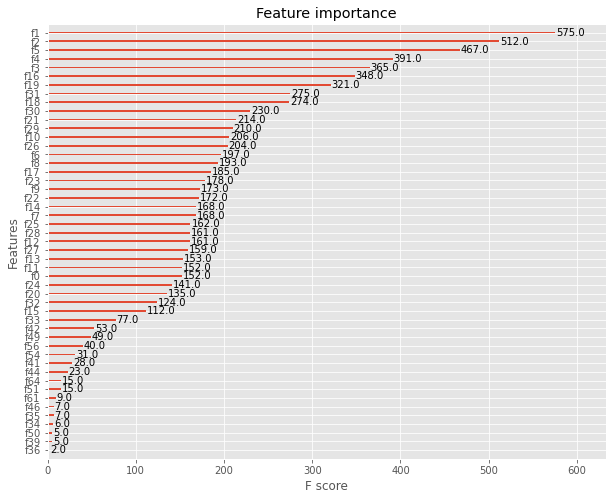

In [43]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(xgb_classifier, ax =ax, importance_type = 'weight')
plt.show()

In [30]:
from sklearn import metrics 

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.99      0.95     17580
        True       0.61      0.13      0.21      1825

    accuracy                           0.91     19405
   macro avg       0.76      0.56      0.58     19405
weighted avg       0.89      0.91      0.88     19405



In [23]:
from sklearn.metrics import log_loss

y_test_conv = y_test.astype(int)

logloss_model = log_loss(y_test_conv, y_pred_probs[:,1])
logloss_sb = log_loss(y_test_conv, sb_test)

print(f"Model Log Loss: {logloss_model}")
print(f"Statsbomb Log Loss: {logloss_sb}")

Model Log Loss: 0.2557354694833415
Statsbomb Log Loss: 0.25385731116418275


In [24]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc = roc_auc_score(y_test_conv, y_pred_probs[:,1])
roc_auc_sb = roc_auc_score(y_test_conv, sb_test)
print(f"My model: {roc_auc}")
print(f"SB: {roc_auc_sb}")

My model: 0.7948046815341219
SB: 0.7993221281967366


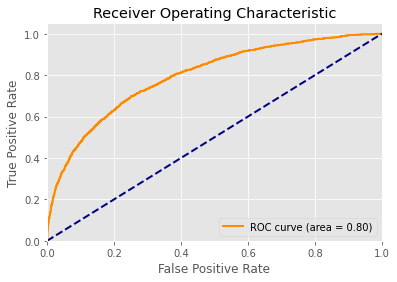

In [28]:

import matplotlib.pyplot as plt
plt.style.use('ggplot')

roc_auc = roc_auc_score(y_test_conv, y_pred_probs[:,1])

fpr, tpr, _ = roc_curve(y_test_conv, y_pred_probs[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

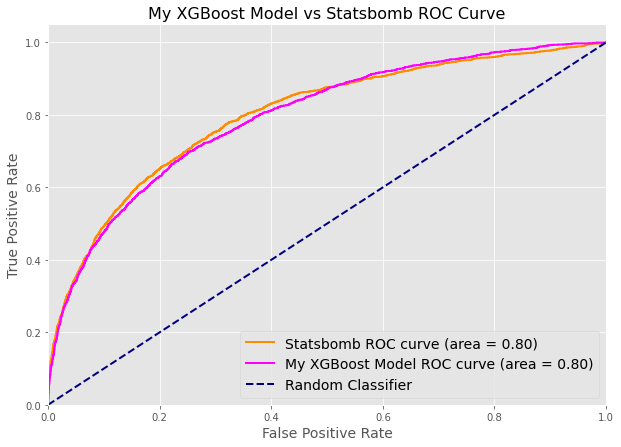

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
plt.style.use('ggplot')


roc_auc_sb = roc_auc_score(y_test_conv, sb_test)

fpr_sb, tpr_sb, _ = roc_curve(y_test_conv, sb_test)
plt.figure(figsize = (10,7))
plt.plot(fpr_sb, tpr_sb, color='darkorange', lw=2, label=f'Statsbomb ROC curve (area = {roc_auc_sb:.2f})')
plt.plot(fpr, tpr, color='#FF00FF', lw=2, label=f'My XGBoost Model ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('My XGBoost Model vs Statsbomb ROC Curve', fontsize = 16)
plt.legend(loc='lower right', fontsize = 14)
#plt.savefig('06-06_attempt.png', dpi = 1000, facecolor = 'white', bbox_inches = 'tight')
plt.show()


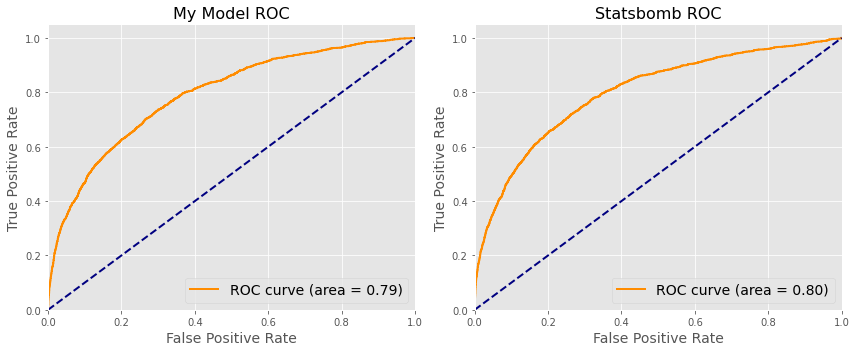

In [23]:


# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# First ROC curve
roc_auc = roc_auc_score(y_test_conv, y_pred_probs[:,1])
fpr, tpr, _ = roc_curve(y_test_conv, y_pred_probs[:, 1])

ax[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate', fontsize = 14)
ax[0].set_ylabel('True Positive Rate', fontsize = 14)
ax[0].set_title('My Model ROC', fontsize = 16)
ax[0].legend(loc='lower right', fontsize = 14)

# Second ROC curve
roc_auc_sb = roc_auc_score(y_test_conv, sb_test)
fpr, tpr, _ = roc_curve(y_test_conv, sb_test)

ax[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_sb:.2f})')
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate', fontsize = 14)
ax[1].set_ylabel('True Positive Rate', fontsize = 14)
ax[1].set_title('Statsbomb ROC', fontsize = 16)
ax[1].legend(loc='lower right', fontsize = 14)

# Show plot
plt.tight_layout()
plt.show()


In [24]:
y[:40]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [31]:

fn_indices = [i for i, (true_label, pred_label) in enumerate(zip(y_test, y_pred)) if true_label == True and pred_label == False]

fn_fts = X_test.iloc[fn_indices]

In [33]:
fn_fts

,x,y,goalkeeper_dx,goalkeeper_dy,opposition_1_dx,opposition_1_dy,opposition_2_dx,opposition_2_dy,opposition_3_dx,opposition_3_dy,...,prev_type_Clearance,prev_type_Dispossessed,prev_type_Dribble,prev_type_Duel,prev_type_Foul Won,prev_type_Interception,prev_type_Miscontrol,prev_type_Pass,prev_type_Pressure,prev_type_Shot
13215,118.2,36.0,0.9,4.4,-0.7,-0.4,-0.1,3.9,-0.4,9.6,...,0,0,0,0,0,0,0,1,0,0
65933,114.3,46.3,4.7,-6.1,-2.4,-2.0,-1.9,-3.5,-4.4,-5.9,...,0,0,0,0,0,0,0,1,0,0
24573,116.2,36.1,0.2,3.0,0.1,-4.5,0.4,5.3,2.7,6.5,...,0,0,0,0,0,0,0,0,0,0
3181,108.9,38.1,10.4,1.8,1.4,-0.5,-0.3,5.2,1.4,8.0,...,0,0,0,0,0,0,0,1,0,0
53103,104.0,47.0,14.0,-3.0,3.0,0.0,1.0,-4.0,-6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13964,114.7,46.7,4.7,-3.7,-0.2,-1.5,4.1,-9.1,-13.4,-7.8,...,0,0,0,0,0,0,0,0,0,0
56673,108.1,25.7,9.2,13.4,0.8,0.9,-0.8,2.1,1.8,10.5,...,0,0,0,0,0,0,0,1,0,0
50178,118.0,42.5,1.1,0.1,2.0,-0.6,-3.2,1.2,1.7,-3.0,...,0,0,0,0,0,0,0,0,0,0
9809,116.5,44.2,2.4,-2.3,-2.9,-1.1,-2.0,4.0,-1.2,-5.3,...,0,0,0,0,0,0,0,1,0,0
